In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
!pip install matplotlib seaborn


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
df = pd.read_csv("../artifacts/raw/raw.csv")
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [ ]:
print(df.isnull().sum())

In [12]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

In [ ]:
df.info()

In [64]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'labels'],
      dtype='object')

In [56]:
y_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']

X_columns = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

In [57]:
X = df[X_columns]

In [58]:
X.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000


In [59]:
y = pd.DataFrame(df[y_columns].values.argmax(axis=1), columns=["labels"])
label_mapping = {i: col for i, col in enumerate(y_columns)}

In [ ]:
print("Label Mapping:", label_mapping)
print(y)

In [27]:
y.value_counts()

labels
6         673
5         402
2         391
1         190
0         158
3          72
4          55
Name: count, dtype: int64

In [60]:
df = pd.concat([X, y], axis=1)

In [61]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,labels
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0


## Multicollinearity
if input features are correlated with each other we call it Multicollinearity
and Multicollinearity negatively effect to ml model

In [7]:
!pip install statsmodels


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [63]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

c:\Users\cakir\python_scripts\mlops_udemy\mlops-project-9\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\cakir\python_scripts\mlops_udemy\mlops-project-9\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,const,0.000000e+00
1,X_Minimum,4.207459e+04
2,X_Maximum,3.841522e+04
3,Y_Minimum,1.704066e+10
4,Y_Maximum,1.704089e+10
5,Pixels_Areas,4.920907e+02
6,X_Perimeter,1.693866e+02
7,Y_Perimeter,1.561859e+03
8,Sum_of_Luminosity,3.672160e+02
9,Minimum_of_Luminosity,8.496362e+00


In [10]:
filtered_vif_df = vif_data[
    (vif_data['VIF'].replace(np.inf, np.nan) <= 10)
].dropna()

In [11]:
clean_features = filtered_vif_df['feature'].tolist()

In [12]:
if 'const' in clean_features:
    clean_features.remove('const')

In [13]:
clean_features

['Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Square_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index']

In [14]:
df = df.drop(y_columns, axis=1)

In [15]:
df["labels"] = y

In [16]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,labels
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0


In [17]:
df = df[clean_features]

In [18]:
df["labels"] = y

In [19]:
df.head()

,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Edges_Index,Square_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,labels
0,76,108,1687,80,0.0498,0.1818,0.4706,1.0000,1.0,0
1,84,123,1687,80,0.7647,0.2069,0.6000,0.9667,1.0,0
2,99,125,1623,100,0.9710,0.3333,0.7500,0.9474,1.0,0
3,99,126,1353,290,0.7287,0.1556,0.5385,1.0000,1.0,0
4,37,126,1353,185,0.0695,0.0662,0.2833,0.9885,1.0,0


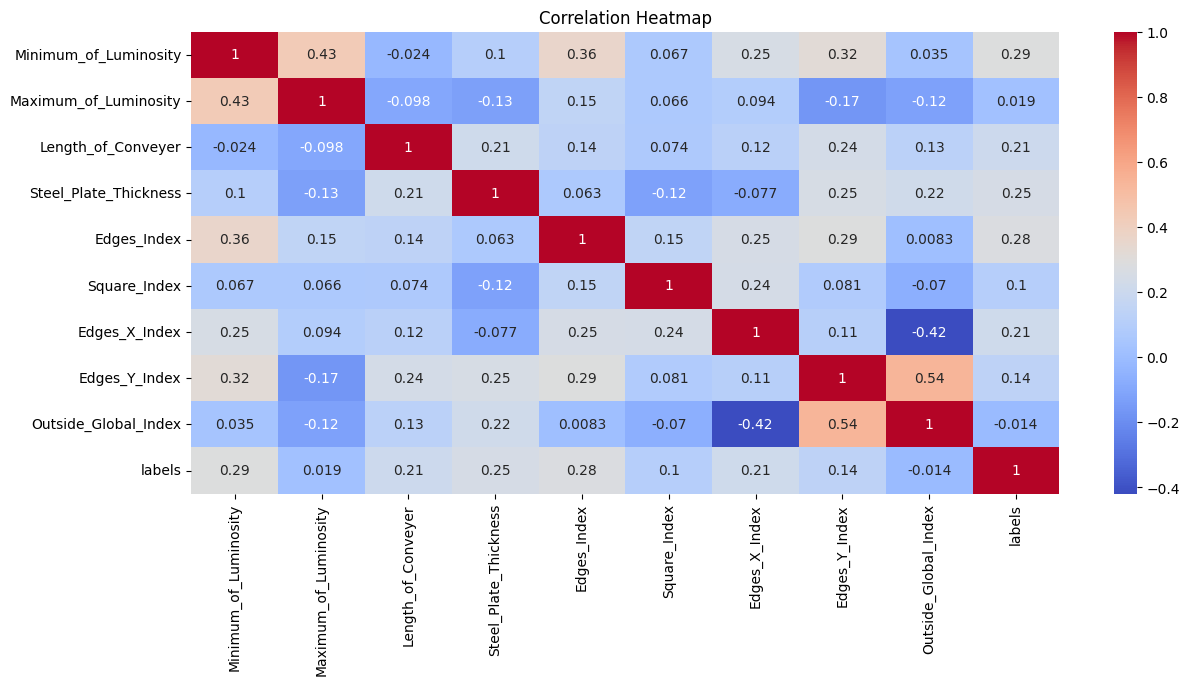

In [20]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

##  Skewness Check

In [21]:
skewness = df.skew()
skewness

Minimum_of_Luminosity   -0.107098
Maximum_of_Luminosity    1.287035
Length_of_Conveyer       0.851422
Steel_Plate_Thickness    2.206935
Edges_Index              0.685771
Square_Index            -0.056306
Edges_X_Index           -0.235096
Edges_Y_Index           -0.928582
Outside_Global_Index    -0.306422
labels                  -0.439811
dtype: float64

no skewness

In [22]:
!pip install -U imbalanced-learn


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
X = df.drop("labels", axis=1)
y = df["labels"]

In [22]:
y.value_counts()

labels
6    673
5    402
2    391
1    190
0    158
3     72
4     55
Name: count, dtype: int64

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

In [24]:
pd.Series(y_res).value_counts()

labels
0    673
1    673
2    673
3    673
4    673
5    673
6    673
Name: count, dtype: int64

In [25]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["labels"] = y_res

In [26]:
df = balanced_df.copy()

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
X = df.drop(columns=["labels"])
y = df["labels"]

In [30]:
X.shape, y.shape

((4711, 9), (4711,))

In [31]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [32]:
feature_importance = model.feature_importances_

In [33]:
feature_importance_df = pd.DataFrame({"feature": X.columns, "importance": feature_importance})

In [34]:
top_features_importance_df = feature_importance_df.sort_values(by="importance", ascending=False)
top_features_importance_df

,feature,importance
3,Steel_Plate_Thickness,0.195665
2,Length_of_Conveyer,0.144696
4,Edges_Index,0.133452
0,Minimum_of_Luminosity,0.123088
7,Edges_Y_Index,0.110022
5,Square_Index,0.108748
6,Edges_X_Index,0.076661
1,Maximum_of_Luminosity,0.067362
8,Outside_Global_Index,0.040306


In [35]:
top_features = top_features_importance_df["feature"].head(6).values
top_df = df[top_features.tolist() + ["labels"]]

In [36]:
top_df

,Steel_Plate_Thickness,Length_of_Conveyer,Edges_Index,Minimum_of_Luminosity,Edges_Y_Index,Square_Index,labels
0,80,1687,0.049800,76,1.000000,0.181800,0
1,80,1687,0.764700,84,0.966700,0.206900,0
2,100,1623,0.971000,99,0.947400,0.333300,0
3,290,1353,0.728700,99,1.000000,0.155600,0
4,185,1353,0.069500,37,0.988500,0.066200,0
...,...,...,...,...,...,...,...
4706,80,1362,0.289315,82,0.724231,0.644781,5
4707,40,1322,0.224781,108,1.000000,0.462719,5
4708,70,1686,0.845608,59,1.000000,0.871280,5
4709,100,1360,0.460711,120,0.629813,0.460833,5


In [65]:
df = top_df

In [41]:
!pip install xgboost lightgbm

                                              0.0/150.0 MB ? eta -:--:--
                                              0.0/150.0 MB 1.4 MB/s eta 0:01:50
                                            0.0/150.0 MB 393.8 kB/s eta 0:06:21
                                            0.1/150.0 MB 751.6 kB/s eta 0:03:20
                                            0.1/150.0 MB 656.4 kB/s eta 0:03:49
                                              0.2/150.0 MB 1.1 MB/s eta 0:02:22
                                            0.2/150.0 MB 962.7 kB/s eta 0:02:36
                                              0.5/150.0 MB 1.6 MB/s eta 0:01:32
                                              0.5/150.0 MB 1.5 MB/s eta 0:01:40
                                              0.9/150.0 MB 2.4 MB/s eta 0:01:03
                                              1.0/150.0 MB 2.6 MB/s eta 0:00:58
                                              2.0/150.0 MB 4.3 MB/s eta 0:00:35
                                              2


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [67]:
X = df.drop(columns=["labels"])
y = df["labels"]

In [68]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVC": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
metrics = {
    "Model": [],
    "Accuracy Score": [],
    "Confusion Matrix": [],
    "classification_report": []
}

In [71]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [72]:

for model_name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    metrics["Model"].append(model_name)
    metrics["Accuracy Score"].append(accuracy_score(y_test, y_pred))
    metrics["Confusion Matrix"].append(confusion_matrix(y_test, y_pred))
    metrics["classification_report"].append(confusion_matrix(y_test, y_pred))


c:\Users\cakir\python_scripts\mlops_udemy\mlops-project-9\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1065
[LightGBM] [Info] Number of data points in the train set: 3768, number of used features: 6
[LightGBM] [Info] Start training from score -1.942730
[LightGBM] [Info] Start training from score -1.957656
[LightGBM] [Info] Start training from score -1.933514
[LightGBM] [Info] Start training from score -1.939034
[LightGBM] [Info] Start training from score -1.955778
[LightGBM] [Info] Start training from score -1.948302
[LightGBM] [Info] Start training from score -1.944584
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [73]:
metrics_df = pd.DataFrame(metrics)
metrics_df


,Model,Accuracy Score,Confusion Matrix,classification_report
0,Random Forest,0.913043,"[[124, 1, 0, 0, 0, 5, 3], [0, 141, 0, 0, 0, 0,...","[[124, 1, 0, 0, 0, 5, 3], [0, 141, 0, 0, 0, 0,..."
1,Gradient Boosting,0.891835,"[[121, 1, 1, 0, 0, 5, 5], [1, 137, 1, 1, 0, 0,...","[[121, 1, 1, 0, 0, 5, 5], [1, 137, 1, 1, 0, 0,..."
2,AdaBoost,0.559915,"[[90, 2, 8, 0, 3, 16, 14], [7, 80, 3, 0, 0, 38...","[[90, 2, 8, 0, 3, 16, 14], [7, 80, 3, 0, 0, 38..."
3,Logistic Regression,0.433722,"[[49, 0, 39, 1, 10, 16, 18], [26, 5, 0, 8, 57,...","[[49, 0, 39, 1, 10, 16, 18], [26, 5, 0, 8, 57,..."
4,SVC,0.363733,"[[79, 11, 24, 18, 1, 0, 0], [0, 28, 10, 103, 0...","[[79, 11, 24, 18, 1, 0, 0], [0, 28, 10, 103, 0..."
5,Decision Tree,0.850477,"[[105, 1, 0, 0, 2, 13, 12], [1, 132, 1, 0, 0, ...","[[105, 1, 0, 0, 2, 13, 12], [1, 132, 1, 0, 0, ..."
6,Naive Bayes,0.669141,"[[105, 19, 2, 0, 1, 4, 2], [5, 118, 8, 0, 0, 7...","[[105, 19, 2, 0, 1, 4, 2], [5, 118, 8, 0, 0, 7..."
7,KNN,0.848356,"[[103, 4, 11, 1, 2, 8, 4], [0, 141, 0, 0, 0, 0...","[[103, 4, 11, 1, 2, 8, 4], [0, 141, 0, 0, 0, 0..."
8,XGBoost,0.915164,"[[127, 0, 0, 0, 0, 5, 1], [0, 139, 0, 1, 0, 0,...","[[127, 0, 0, 0, 0, 5, 1], [0, 139, 0, 1, 0, 0,..."
9,LightGBM,0.914104,"[[125, 1, 0, 0, 0, 5, 2], [1, 139, 0, 0, 0, 0,...","[[125, 1, 0, 0, 0, 5, 2], [1, 139, 0, 0, 0, 0,..."


In [74]:
metrics_df.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score,Confusion Matrix,classification_report
8,XGBoost,0.915164,"[[127, 0, 0, 0, 0, 5, 1], [0, 139, 0, 1, 0, 0,...","[[127, 0, 0, 0, 0, 5, 1], [0, 139, 0, 1, 0, 0,..."
9,LightGBM,0.914104,"[[125, 1, 0, 0, 0, 5, 2], [1, 139, 0, 0, 0, 0,...","[[125, 1, 0, 0, 0, 5, 2], [1, 139, 0, 0, 0, 0,..."
0,Random Forest,0.913043,"[[124, 1, 0, 0, 0, 5, 3], [0, 141, 0, 0, 0, 0,...","[[124, 1, 0, 0, 0, 5, 3], [0, 141, 0, 0, 0, 0,..."
1,Gradient Boosting,0.891835,"[[121, 1, 1, 0, 0, 5, 5], [1, 137, 1, 1, 0, 0,...","[[121, 1, 1, 0, 0, 5, 5], [1, 137, 1, 1, 0, 0,..."
5,Decision Tree,0.850477,"[[105, 1, 0, 0, 2, 13, 12], [1, 132, 1, 0, 0, ...","[[105, 1, 0, 0, 2, 13, 12], [1, 132, 1, 0, 0, ..."
7,KNN,0.848356,"[[103, 4, 11, 1, 2, 8, 4], [0, 141, 0, 0, 0, 0...","[[103, 4, 11, 1, 2, 8, 4], [0, 141, 0, 0, 0, 0..."
6,Naive Bayes,0.669141,"[[105, 19, 2, 0, 1, 4, 2], [5, 118, 8, 0, 0, 7...","[[105, 19, 2, 0, 1, 4, 2], [5, 118, 8, 0, 0, 7..."
2,AdaBoost,0.559915,"[[90, 2, 8, 0, 3, 16, 14], [7, 80, 3, 0, 0, 38...","[[90, 2, 8, 0, 3, 16, 14], [7, 80, 3, 0, 0, 38..."
3,Logistic Regression,0.433722,"[[49, 0, 39, 1, 10, 16, 18], [26, 5, 0, 8, 57,...","[[49, 0, 39, 1, 10, 16, 18], [26, 5, 0, 8, 57,..."
4,SVC,0.363733,"[[79, 11, 24, 18, 1, 0, 0], [0, 28, 10, 103, 0...","[[79, 11, 24, 18, 1, 0, 0], [0, 28, 10, 103, 0..."


lightgbm, random forest, xgboost

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [65]:
X = df.drop(columns=["labels"])
y = df["labels"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=5, cv=8, verbose=2, random_state=42, n_jobs=-1, scoring="accuracy")

In [67]:
random_search.fit(X_train, y_train)

Fitting 8 folds for each of 5 candidates, totalling 40 fits


RandomizedSearchCV(cv=8, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F362650750>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F362648ED0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F36264BAD0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F35DCED250>},
                   random_state=42, scoring='accuracy', verbose=2)

In [68]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 71}

In [69]:
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9162248144220573

In [50]:
lgbm = LGBMClassifier(random_state=42)
param_dist = {
    'num_leaves': randint(20, 150),
    'max_depth': randint(3, 20),
    'learning_rate': uniform(0.01, 0.3),  # 0.01 ila 0.31 arası
    'n_estimators': randint(50, 500),
    'min_child_samples': randint(5, 30),
    'subsample': uniform(0.5, 0.5),       # 0.5 ila 1.0 arası
    'colsample_bytree': uniform(0.5, 0.5),
    'reg_alpha': uniform(0, 1.0),
    'reg_lambda': uniform(0, 1.0)
}
random_search = RandomizedSearchCV(estimator=lgbm, param_distributions=param_dist, n_iter=5, cv=8, verbose=2, random_state=42, n_jobs=-1, scoring="accuracy")
random_search.fit(X_train, y_train)
best_lgbm_model = random_search.best_estimator_
y_pred = best_lgbm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

Fitting 8 folds for each of 5 candidates, totalling 40 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1668
[LightGBM] [Info] Number of data points in the train set: 3768, number of used features: 9
[LightGBM] [Info] Start training from score -1.942730
[LightGBM] [Info] Start training from score -1.957656
[LightGBM] [Info] Start training from score -1.933514
[LightGBM] [Info] Start training from score -1.939034
[LightGBM] [Info] Start training from score -1.955778
[LightGBM] [Info] Start training from score -1.948302
[LightGBM] [Info] Start training from score -1.944584
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

0.9289501590668081

In [82]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       133
           1       0.99      0.99      0.99       141
           2       0.98      0.99      0.98       128
           3       0.99      1.00      1.00       131
           4       0.97      0.99      0.98       140
           5       0.85      0.85      0.85       136
           6       0.83      0.72      0.77       134

    accuracy                           0.93       943
   macro avg       0.93      0.93      0.93       943
weighted avg       0.93      0.93      0.93       943



In [73]:
random_search.best_params_

{'colsample_bytree': np.float64(0.6163856702151521),
 'learning_rate': np.float64(0.03718193035984624),
 'max_depth': 14,
 'min_child_samples': 27,
 'n_estimators': 293,
 'num_leaves': 83,
 'reg_alpha': np.float64(0.4667628932479799),
 'reg_lambda': np.float64(0.8599404067363206),
 'subsample': np.float64(0.8401537692938899)}

In [51]:
import joblib
joblib.dump(best_lgbm_model, "best_lgbm_model.pkl")

['best_lgbm_model.pkl']

In [ ]:
loaded_model = joblib.load("best_rf_model.pkl")